## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset
import pickle
from sklearn.model_selection import train_test_split

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load cleaned data

In [2]:
data = pd.read_csv("data/cleaned_static_features.csv",index_col=0)
with open("data/groups.pkl", 'rb') as file:
    groups = pickle.load(file)

In [3]:
data

,participant_id,session_id,task_name,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,...,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,duration,mean_intensity_db,std_intensity_db,range_ratio_intensity_db,std_hnr_db,stoi,pesq,si_sdr,Voice Disorders,Neurological and Neurodegenerative Disorders,Mood and Psychiatric Disorders,Respiratory Disorders,participant_id_int
0,004d42e9,07031CC3,Animal-fluency,30.849073,0.205649,26.938833,32.299248,36.319099,9.380266,321.246490,510.563202,117.347115,100.953537,0.752154,1.965143,0.097038,0.182385,0.885161,0.788124,31.025257,29.989340,21.278385,27.896988,0.772914,1.885674,14.752519,0.957261,14.424479,0.702470,9.369092,1.334552,10.565827,1.165819,0.041212,1.570621,1.292950,0.774699,7.121689,0.525285,7.558573,...,0.241663,-0.028066,-1.127775,-0.018564,-0.994498,0.487329,0.825824,25.447193,0.333564,23.087852,0.417565,6.332721,2.621659,-4.571756,-3.314600,-20.646584,32.390488,-0.055269,0.002512,0.798206,0.866522,0.650434,0.113333,0.088153,1.440263,1.709459,-13.252327,60.023625,79.612939,14.580183,2.522056,6.754861,0.594471,1.159233,-14.364435,0,1,1,0,0
26,004d42e9,07031CC3,Productive-Vocabulary-1,34.447186,0.057132,32.960548,33.506256,36.057877,3.097328,100.624840,63.160595,21.610495,5.325989,2.242635,1.056381,0.358277,0.801777,5.122904,4.764627,48.605343,33.348827,44.992035,33.619648,2.247470,1.065246,7.341717,1.144747,14.516586,0.618530,7.448459,1.308448,9.431314,1.011212,0.023884,0.835676,0.647486,1.372729,6.567757,0.498981,5.199500,...,0.359291,-0.034896,-0.800103,-0.020911,-0.825478,2.182905,0.632738,13.695797,0.732476,18.101223,0.435583,8.676987,1.266327,5.025863,2.641075,-16.040728,26.647758,-0.054425,-0.008761,2.266506,3.051181,0.791296,0.115000,0.126590,1.002222,0.921614,-7.204371,10.170375,86.136732,13.277549,2.078612,7.996467,0.802794,1.277508,-0.301972,0,1,1,0,0
27,004d42e9,07031CC3,Productive-Vocabulary-2,35.895359,0.092448,33.253757,35.642937,37.830379,4.576622,381.294708,394.408051,34.633713,35.775856,2.080391,1.086414,0.378743,0.811548,4.758191,4.379448,53.563671,33.582783,42.985943,32.169971,2.059937,1.102539,8.057500,0.980905,13.073100,0.765794,7.821162,1.302100,9.301218,1.021805,0.028653,0.994457,0.972851,1.129390,7.210585,0.611255,7.052200,...,0.379388,-0.030853,-0.919480,-0.017160,-0.7

In [4]:
groups

array([  0,   0,   0, ..., 441, 441, 441], shape=(19238,))

## Reshape data

In [5]:
disorders = ["Voice Disorders", "Neurological and Neurodegenerative Disorders", "Mood and Psychiatric Disorders","Respiratory Disorders"]


y_voice = data["Voice Disorders"].copy().to_numpy()
y_neuro = data["Neurological and Neurodegenerative Disorders"].copy().to_numpy()
y_psych = data["Mood and Psychiatric Disorders"].copy().to_numpy()
y_resp = data["Respiratory Disorders"].copy().to_numpy()
X = data.copy().drop(columns=["participant_id", "session_id","task_name"]+disorders).to_numpy()

In [6]:
X.shape

(19238, 97)

In [7]:
y_voice.shape

(19238,)

## Average over sessions within subject

In [8]:
n_subj = groups[-1]+1
X_ave = np.zeros((n_subj, X.shape[1]))
y_voice_ave = np.zeros(n_subj)
y_neuro_ave = np.zeros(n_subj)
y_psych_ave = np.zeros(n_subj)
y_resp_ave = np.zeros(n_subj)
for g in np.arange(n_subj):
    curr_X = X[np.where(groups==g)].mean(axis=0)
    X_ave[g] = curr_X
    y_voice_ave[g] = y_voice[np.where(groups==g)].mean()
    y_neuro_ave[g] = y_neuro[np.where(groups==g)].mean()
    y_psych_ave[g] = y_psych[np.where(groups==g)].mean()
    y_resp_ave[g] = y_resp[np.where(groups==g)].mean()
print(X_ave.shape)

(442, 97)


## Normalization

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_proc = ss.fit_transform(X)
X_proc

array([[ 0.35671517,  1.22982296,  0.23126498, ..., -0.9498115 ,
        -1.11640847, -1.70446606],
       [ 0.6293551 , -0.40929   ,  0.71729659, ..., -0.83189516,
        -0.21137239, -1.70446606],
       [ 0.73908762, -0.01952797,  0.74096242, ..., -0.90941962,
        -0.3138204 , -1.70446606],
       ...,
       [-0.05870263, -0.03576868, -0.01203694, ..., -0.15054014,
         0.59605065,  1.70435918],
       [ 0.04257933,  0.79472738,  0.07133398, ..., -0.42742919,
         0.24079072,  1.70435918],
       [-0.03307289,  0.09295254,  0.05313916, ..., -0.56574048,
         0.18794105,  1.70435918]], shape=(19238, 97))

## PCA and t-SNE

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_proc)

tsne = TSNE()
X_tsne = tsne.fit_transform(X_proc)

#### Voice Disorders

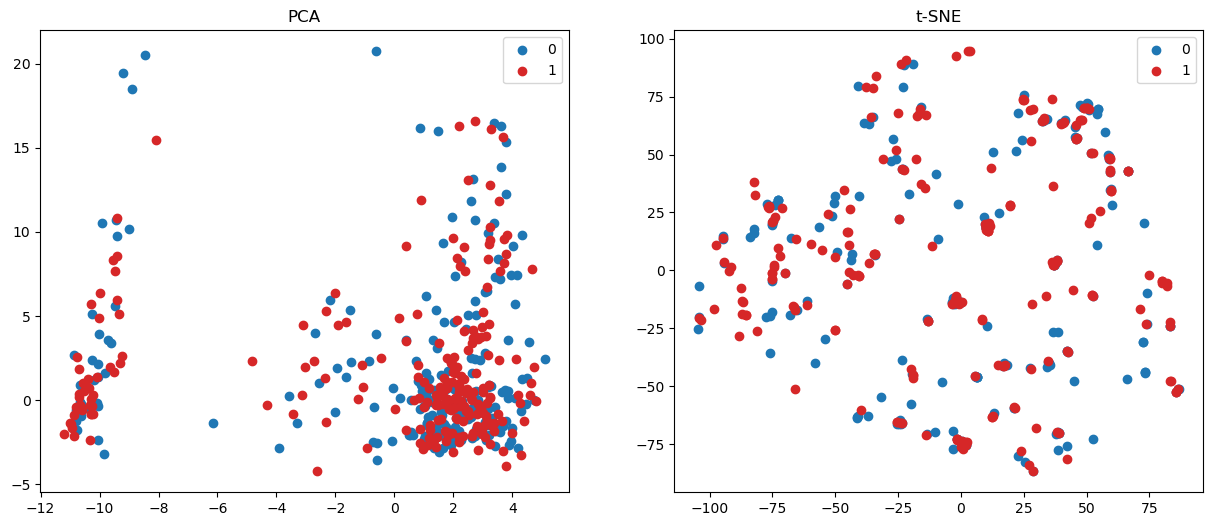

In [11]:
fig,axes = plt.subplots(1,2,figsize=(15,6))
for val,c in zip([0,1],["tab:blue","tab:red"]):
    inds = np.where(y_voice_ave==val)
    axes[0].scatter(X_pca[inds, 0], X_pca[inds, 1], color=c, label=val)
    axes[1].scatter(X_tsne[inds, 0], X_tsne[inds, 1], color=c, label=val)
axes[0].legend()
axes[0].set_title("PCA")
axes[1].legend()
axes[1].set_title("t-SNE")
plt.show()

#### Neuro

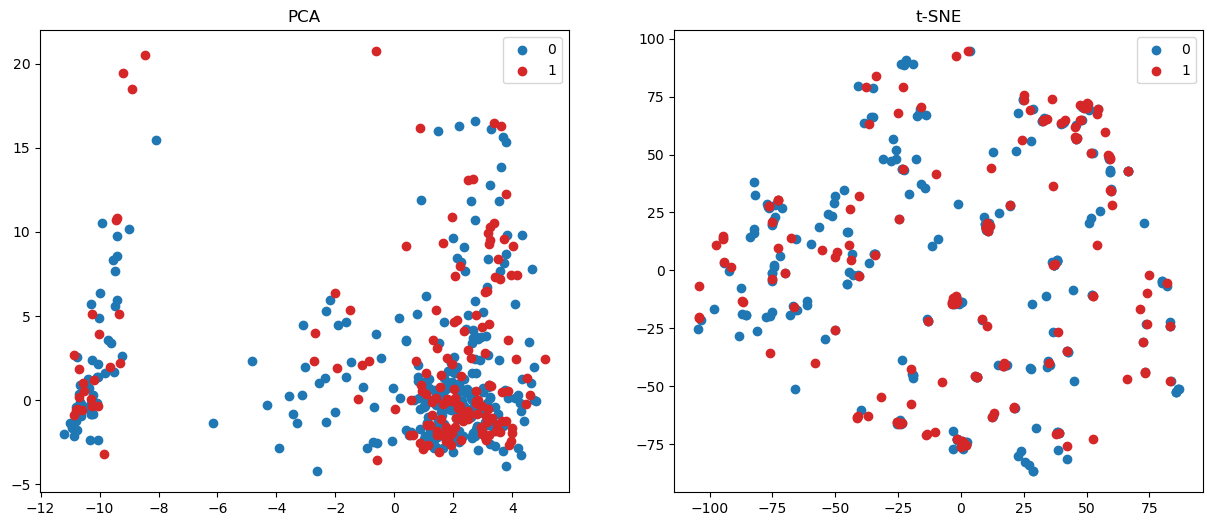

In [12]:
fig,axes = plt.subplots(1,2,figsize=(15,6))
for val,c in zip([0,1],["tab:blue","tab:red"]):
    inds = np.where(y_neuro_ave==val)
    axes[0].scatter(X_pca[inds, 0], X_pca[inds, 1], color=c, label=val)
    axes[1].scatter(X_tsne[inds, 0], X_tsne[inds, 1], color=c, label=val)
axes[0].legend()
axes[0].set_title("PCA")
axes[1].legend()
axes[1].set_title("t-SNE")
plt.show()

#### Psych

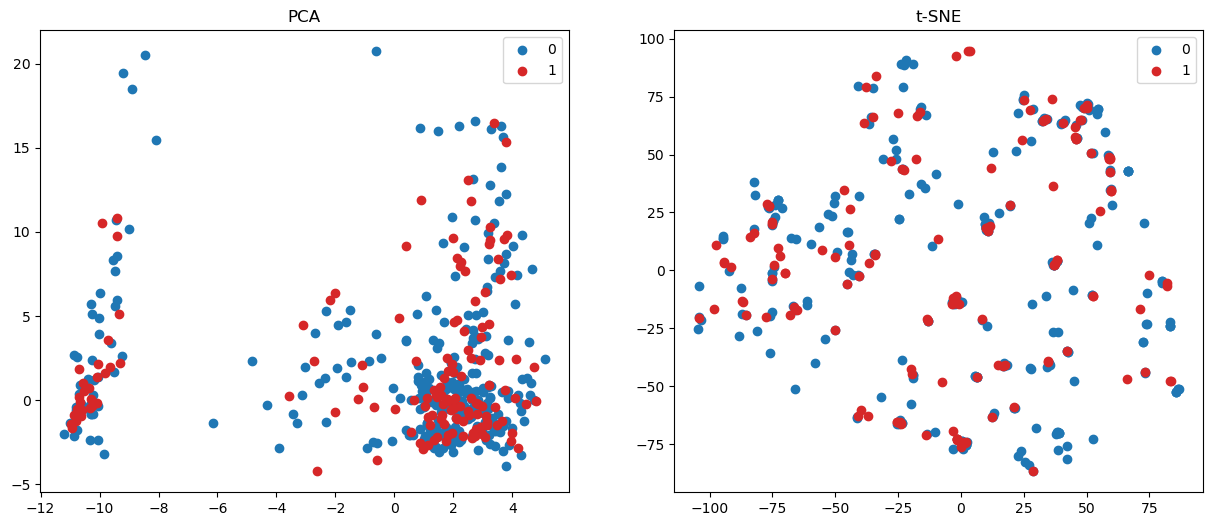

In [13]:
fig,axes = plt.subplots(1,2,figsize=(15,6))
for val,c in zip([0,1],["tab:blue","tab:red"]):
    inds = np.where(y_psych_ave==val)
    axes[0].scatter(X_pca[inds, 0], X_pca[inds, 1], color=c, label=val)
    axes[1].scatter(X_tsne[inds, 0], X_tsne[inds, 1], color=c, label=val)
axes[0].legend()
axes[0].set_title("PCA")
axes[1].legend()
axes[1].set_title("t-SNE")
plt.show()

#### Respiratory

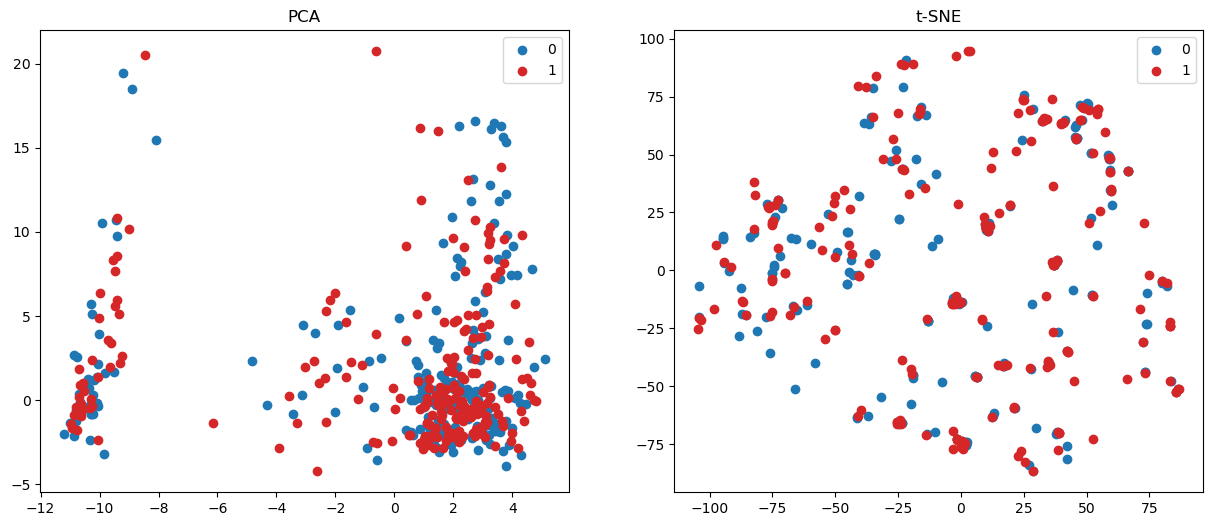

In [14]:
fig,axes = plt.subplots(1,2,figsize=(15,6))
for val,c in zip([0,1],["tab:blue","tab:red"]):
    inds = np.where(y_resp_ave==val)
    axes[0].scatter(X_pca[inds, 0], X_pca[inds, 1], color=c, label=val)
    axes[1].scatter(X_tsne[inds, 0], X_tsne[inds, 1], color=c, label=val)
axes[0].legend()
axes[0].set_title("PCA")
axes[1].legend()
axes[1].set_title("t-SNE")
plt.show()

## Train models for each disorder class

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
import warnings

warnings.filterwarnings('ignore')

disorder_labels = ["Voice","Neuro","Psych","Resp"]

y_all = [y_voice_ave, y_neuro_ave, y_psych_ave, y_resp_ave]

cv_results = {}

for curr_y,disorder_label in zip(y_all, disorder_labels):

    train_f1s = []
    val_f1s = []

    X_train, X_test, y_train, y_test = train_test_split(X_ave, curr_y, test_size=0.15, random_state=42)

    # 10-fold Stratified CV on the train+val set to produce validation scores
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    model = LogisticRegression(random_state=42, max_iter=1000)

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # Work with a fresh clone of the estimator for each fold
        est = clone(model)
        est.fit(X_tr, y_tr)

        y_tr_pred = est.predict(X_tr)
        y_val_pred = est.predict(X_val)

        tr_f1 = f1_score(y_tr, y_tr_pred, average="weighted")
        val_f1 = f1_score(y_val, y_val_pred, average="weighted")

        train_f1s.append(tr_f1)
        val_f1s.append(val_f1)

    # Train final estimator on the full train+val set and evaluate on test
    final_est = clone(model)
    final_est.fit(X_train, y_train)
    y_test_pred = final_est.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    print(f" Test F1 for {disorder_label}: {test_f1:.3f}")

    cv_results[disorder_label] = {
        'train_f1s': train_f1s,
        'val_f1s': val_f1s,
        'test_f1': test_f1,
        'y_test': y_test,
        'y_test_pred': y_test_pred
    }

 Test F1 for Voice: 0.716
 Test F1 for Neuro: 0.751
 Test F1 for Psych: 0.611
 Test F1 for Resp: 0.707


In [36]:
cv_results

{'Voice': {'train_f1s': [0.7863011633931515,
   0.7802177111099935,
   0.8042026085156304,
   0.8008707231874768,
   0.7893732096346633,
   0.807372929874094,
   0.822385539181639,
   0.801627290332346,
   0.7958776648489974,
   0.7810650887573964],
  'val_f1s': [0.7099244993981836,
   0.7572156196943972,
   0.5765885301489017,
   0.6842105263157895,
   0.6305555555555555,
   0.7545993887457303,
   0.6216216216216216,
   0.8371224165341811,
   0.6471042471042471,
   0.7013959013959014],
  'test_f1': 0.7160358101699006,
  'y_test': array([0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
         1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
         0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
         0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.]),
  'y_test_pred': array([1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
         1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.

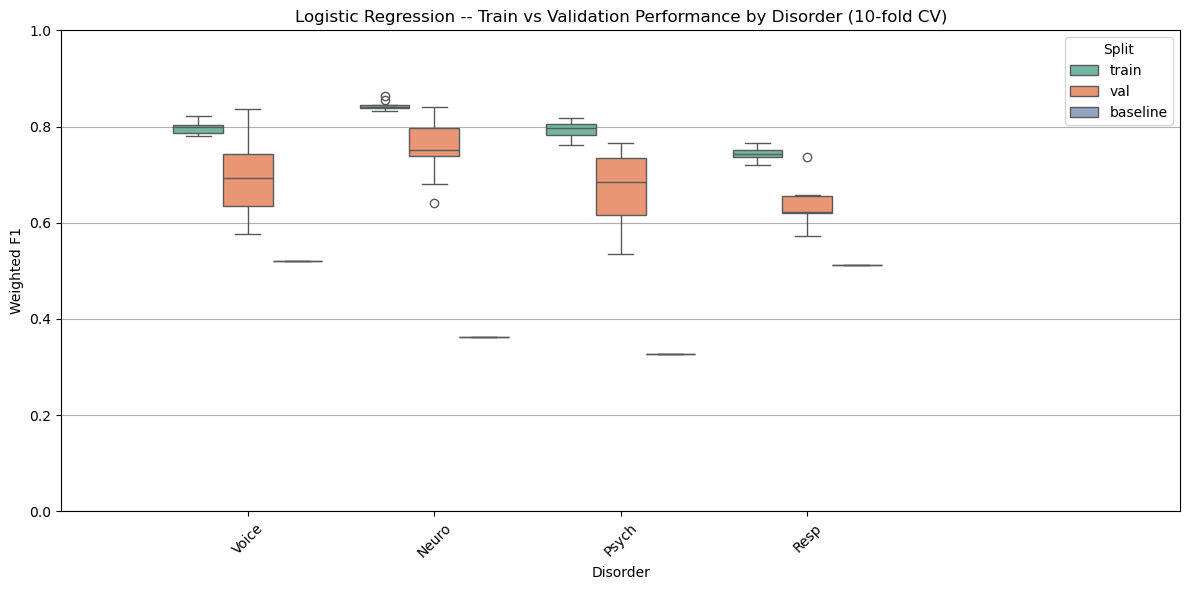


CV summary (mean ± std) and test weighted F1 (10-fold CV):
model  train_f1_mean  train_f1_std  val_f1_mean  val_f1_std  test_f1
Voice       0.796929      0.012449     0.692034    0.073326 0.716036
Neuro       0.843711      0.008935     0.753299    0.056808 0.751283
Psych       0.792934      0.018163     0.666417    0.079808 0.611192
 Resp       0.743525      0.013282     0.635017    0.042259 0.706882

Final test set performance by model:

Disorder: Voice
 Test Weighted F1: 0.716
 Classification report:
              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69        31
         1.0       0.73      0.75      0.74        36

    accuracy                           0.72        67
   macro avg       0.71      0.71      0.71        67
weighted avg       0.72      0.72      0.72        67

 Confusion matrix:
[[21 10]
 [ 9 27]]

Disorder: Neuro
 Test Weighted F1: 0.751
 Classification report:
              precision    recall  f1-score   support

     

In [41]:
# Grouped boxplot: training vs validation F1 per model (10-fold CV)
import seaborn as sns

# baseline = y_ave.mean()

# Build long-form DataFrame with one row per fold per model/split
rows = []
for d,curr_y in zip(disorder_labels,y_all):
    for v in cv_results[d]['train_f1s']:
        rows.append({'disorder': d, 'split': 'train', 'f1': v})
    for v in cv_results[d]['val_f1s']:
        rows.append({'disorder': d, 'split': 'val', 'f1': v})
        rows.append({'disorder': d, 'split': 'baseline', 'f1':curr_y.mean()})

plot_df = pd.DataFrame(rows)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='disorder', y='f1', hue='split', data=plot_df, palette='Set2')
ax.set_title('Logistic Regression -- Train vs Validation Performance by Disorder (10-fold CV)')
ax.set_ylabel('Weighted F1')
ax.set_xlabel('Disorder')
ax.set_xlim([-1, 5])
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Split')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Summary statistics table (mean ± std) for convenience
summary_rows = []
for d in disorder_labels:
    train_mean = np.mean(cv_results[d]['train_f1s'])
    train_std = np.std(cv_results[d]['train_f1s'])
    val_mean = np.mean(cv_results[d]['val_f1s'])
    val_std = np.std(cv_results[d]['val_f1s'])
    summary_rows.append({'model': d,
                         'train_f1_mean': train_mean,
                         'train_f1_std': train_std,
                         'val_f1_mean': val_mean,
                         'val_f1_std': val_std,
                         'test_f1': cv_results[d]['test_f1']})

summary_df = pd.DataFrame(summary_rows)
print('\nCV summary (mean ± std) and test weighted F1 (10-fold CV):')
print(summary_df[['model','train_f1_mean','train_f1_std','val_f1_mean','val_f1_std','test_f1']].to_string(index=False))

# Print final test F1 and reports per model
from sklearn.metrics import classification_report, confusion_matrix
print('\nFinal test set performance by model:')
for d in disorder_labels:
    print(f"\nDisorder: {d}")
    print(f" Test Weighted F1: {cv_results[d]['test_f1']:.3f}")
    print(' Classification report:')
    print(classification_report(cv_results[d]['y_test'], cv_results[d]['y_test_pred']))
    print(' Confusion matrix:')
    print(confusion_matrix(cv_results[d]['y_test'], cv_results[d]['y_test_pred']))